In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart_disease_uci.csv to heart_disease_uci (1).csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('heart_disease_uci.csv')

# Show first few rows
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
df.drop(['ca', 'thal'], axis=1, inplace=True)


In [ ]:
# Fill numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


/tmp/ipython-input-9-1544546753.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
# Fill categorical columns with mode (future-proof version)
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    df[col] = df[col].infer_objects(copy=False)  # Safely downcast to string/integer if needed


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
# Target: convert num (0–4) to binary
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Drop unused columns
df.drop(['id', 'num', 'dataset'], axis=1, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
pred_lr = lr_model.predict(X_test)
print("🎯 Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr))


🎯 Logistic Regression Accuracy: 0.8206521739130435
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        82
           1       0.83      0.84      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



In [ ]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
pred_xgb = xgb_model.predict(X_test)
print("🎯 XGBoost Accuracy:", accuracy_score(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:33:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🎯 XGBoost Accuracy: 0.8152173913043478
              precision    recall  f1-score   support

           0       0.82      0.76      0.78        82
           1       0.81      0.86      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the deep learning model
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile and train
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = dl_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

# Predict and evaluate
pred_dl = (dl_model.predict(X_test) > 0.5).astype('int32')
print("🎯 Deep Learning Accuracy:", accuracy_score(y_test, pred_dl))
print(classification_report(y_test, pred_dl))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
🎯 Deep Learning Accuracy: 0.8532608695652174
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        82
           1       0.87      0.86      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [ ]:
import numpy as np
from scipy.stats import mode

# Combine predictions
combined_preds = np.array([pred_lr, pred_xgb, pred_dl.reshape(-1)])

# Take majority vote across axis 0 and flatten the result
rag_final = mode(combined_preds, axis=0).mode.flatten()

# Final evaluation
from sklearn.metrics import accuracy_score, classification_report
print("🤖 Multi-Agent RAG Accuracy:", accuracy_score(y_test, rag_final))
print(classification_report(y_test, rag_final))



🤖 Multi-Agent RAG Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        82
           1       0.85      0.86      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



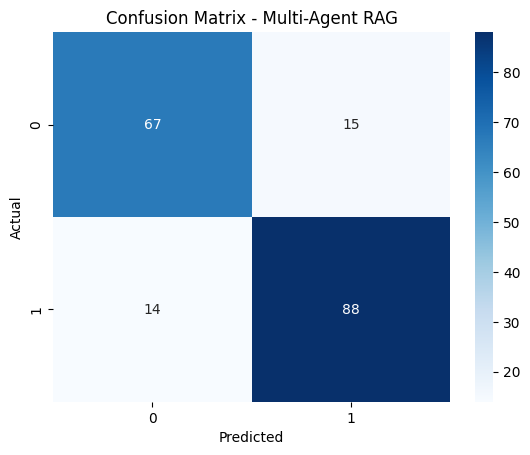

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
cm = confusion_matrix(y_test, rag_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Multi-Agent RAG")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate and print final model accuracy
final_rag_accuracy = accuracy_score(y_test, rag_final)
print("✅ Final Multi-Agent RAG Model Accuracy:", final_rag_accuracy)


✅ Final Multi-Agent RAG Model Accuracy: 0.842391304347826
